In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defining the constants in CGS units
Lsun = 3.8515*10**33 # Solar luminosity [erg/s]
Rsun = 6.9598*10**10  # Radius of the sun [cm]
stefan_const = 5.67051*10**(-5) # Stefan_boltzmann constant (σ)[erg/cm^2 s K^4]
Temp_obj  = 8250      #  Effective temperature [K]
solar_flux = 1.4*10**6   # Solar flux [erg/s]


In [2]:
#Reading the data files
df1 = pd.read_csv("final_observed_data.csv")
df2 = pd.read_csv("model_data.csv")
df3 = pd.read_csv("red_data.csv")

# print(df1.head())
# print(df1.info())
df1.dropna(axis=0, how='all', inplace=True)
df1.dropna(axis=1, how='all', inplace=True)
#print(df1.info())

#print(df2.info())
#print(df3.info())

In [3]:

#Photometric data
obs_wavelength = df1['wavelength']  # in nm
obs_freq = df1['frequency'] # in Hz
obs_flux = df1['flux'] # in CGS units
obs_eflux = df1['fluxer'] # in CGS units


#Model data
model_wav = df2['wavelength'] # in nm
model_freq = df2['frequency'] # in Hz
model_flux = df2['flux']     # in CGS

#Reddening data
red_wavelength=df3['wavelength']
ISM_red = df3['magn'] # in mag


vflux = []                                    # Flux*Freq array
for i in range(len(obs_flux)):
  vflux.append(obs_flux[i]*obs_freq[i])

vflux_model = []                              # Model_flux*model_freq array
for i in range(len(model_flux)):
  vflux_model.append(model_flux[i]*model_freq[i])




In [4]:
print(len(obs_wavelength))

print(obs_flux[27])


134
9.090000000000001e-26


Text(0.5, 1.0, 'Plot for Kurucz model and data')

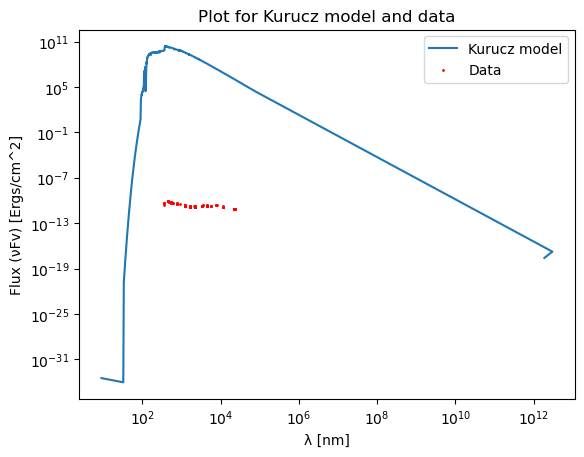

In [5]:
#Kurucz model plotted with observed data points
plt.plot(model_wav, vflux_model, label = "Kurucz model" )
plt.xscale("log")
plt.yscale("log")
plt.xlabel("λ [nm]")
plt.ylabel("Flux (νFv) [Ergs/cm^2]")
plt.scatter(obs_wavelength, vflux, s=1 , label = "Data", color = 'r')
plt.legend()
plt.title("Plot for Kurucz model and data")


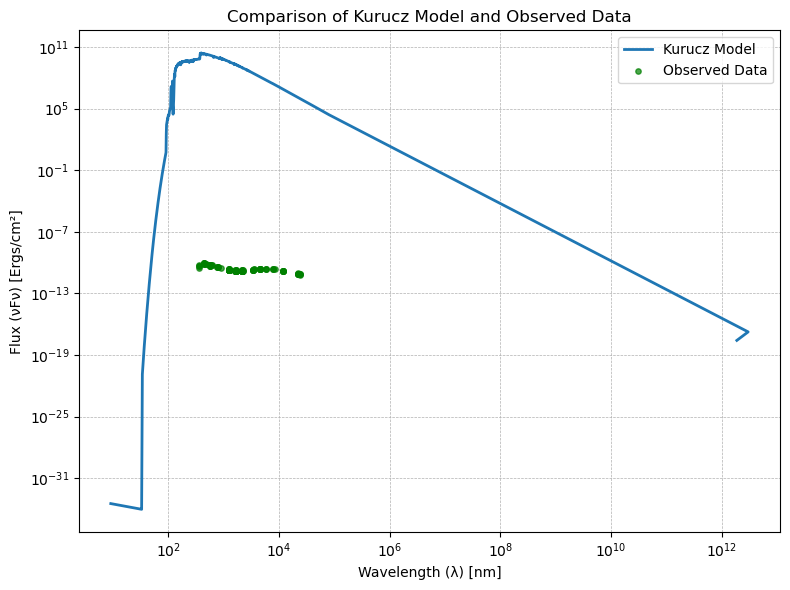

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(model_wav, vflux_model, label="Kurucz Model", linewidth=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Wavelength (λ) [nm]")
plt.ylabel("Flux (νFν) [Ergs/cm²]")
plt.scatter(obs_wavelength, vflux, s=15, label="Observed Data", color='green', alpha=0.7)
plt.legend()
plt.title("Comparison of Kurucz Model and Observed Data")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [7]:
#Choosing the band wavelength (nm)

def match(a,b):
     val = np.asarray(a)
     c = (np.abs(a - b)).argmin()

     for i in range(len(a)):
       if val[c] == a[i]:
          return i


H_wavelength = 1650
J_wavelength = 1250
K_wavelength = 2190

band_wave = H_wavelength              # band wavelength used for scaling the model

#finding the index for the closest band wavelength that matches the photometric wavelength
index_data = match(obs_wavelength, band_wave)

index_mod  = match(model_wav, band_wave)

print(index_data)
print(obs_wavelength[index_data])

print(index_mod)
print(model_wav[index_mod])

56
1649.477073
806
1645.0


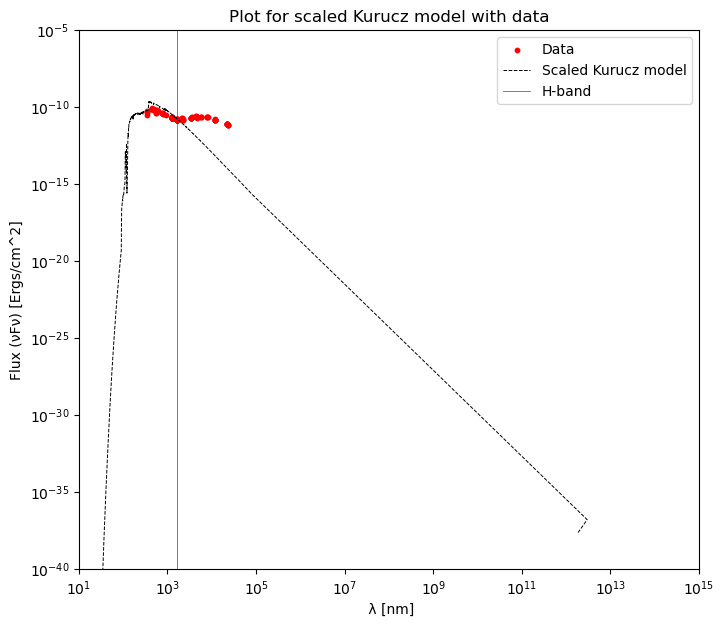

In [17]:
#Plot with scaled kurucz model and data
plt.figure(figsize = (8,7))
plt.scatter(obs_wavelength, vflux, s=10, label = "Data", color ='r')

scaling_coeff = vflux[index_data]/vflux_model[index_mod]

vflux_model_scaled = []
for i in range(len(vflux_model)):
   vflux_model_scaled.append(vflux_model[i]*scaling_coeff)

plt.plot(model_wav, vflux_model_scaled, 'k--' , label = "Scaled Kurucz model", linewidth = 0.7)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-40, 10**-5)
plt.xlim(10,10**15)
plt.title("Plot for scaled Kurucz model with data")
plt.axvline(x = band_wave, color = 'g', label = 'H-band', linewidth = 0.5)
plt.legend()
plt.xlabel(" λ [nm]")
plt.ylabel("Flux (νFν) [Ergs/cm^2]")
plt.show()

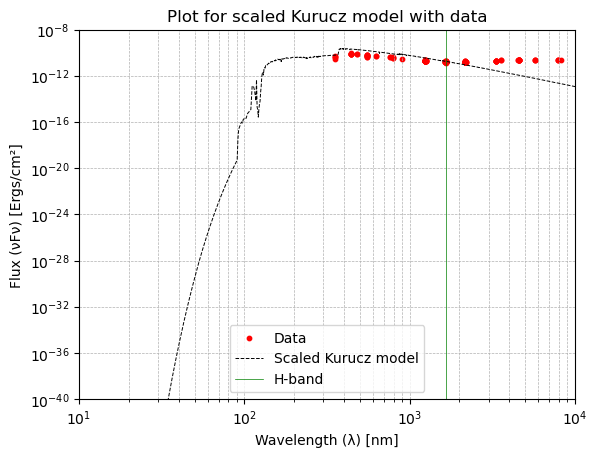

In [18]:
plt.scatter(obs_wavelength, vflux, s=10, label="Data", color='r')
plt.plot(model_wav, vflux_model_scaled, 'k--', label="Scaled Kurucz model", linewidth=0.7)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-40, 10**-8)
plt.xlim(10, 10**4)
plt.title("Plot for scaled Kurucz model with data")
plt.axvline(x=band_wave, color='g', label='H-band', linewidth=0.5)
plt.legend()
plt.xlabel("Wavelength (λ) [nm]")
plt.ylabel("Flux (νFν) [Ergs/cm²]")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines
plt.show()


In [19]:
ae=ISM_red
ae1=[] # array of ism reddening values
for n in range(len(obs_wavelength)):
  for m in range(len(red_wavelength)):
    if round(obs_wavelength[n])== float(red_wavelength[m]):
      ae1.append(ae[m])
    #elif wav1[n] > max(wav_red1):
      #ae1.append(0)
 # Appending the corresponding model fluxes in SED data

fluxmod= []
for n in range(len(obs_wavelength)):
  for m in range(len(model_wav)):
    if obs_wavelength[n]< model_wav[m]:
      fluxmod.append(model_flux[m-1])
      break



In [20]:
print(len(obs_flux))
print(len(fluxmod))
print(len(ae1))
#at larger wavelengths effects of ism can be considered as negligible
m= len(obs_flux) - len(ae1)
for i in range(m):
  ae1.append(0)
print(len(ae1))
ISM_red=ae1

134
134
123
134


In [21]:
#Dereddening

e = []            #colour excess index
e = np.arange(0,1,0.001)
fdred = []
chi_squared = []
N = len(obs_flux)   # Total no. of points
D = 1               # No. of parameters

m_flux = []
for i in range(len(obs_wavelength)):
  for j in range(len(model_wav)):
    if obs_wavelength[i]< model_wav[j]:
      m_flux.append(model_flux[j-1])
      break



In [22]:
scaling_coefficient  =  obs_flux[index_data]/m_flux[index_data]

scaling_flux = []

#For scaling the model
for i in range(len(m_flux)):
     s = scaling_coefficient*m_flux[i]
     scaling_flux.append(s)


In [23]:

#Function for chi^2 approximation
def chi_square(f_dred, f_errd):
   chi = []
   for i in range (len(scaling_flux)):
     c = ((f_dred[i]-scaling_flux[i])/(f_errd[i]))**2
     chi.append(c)

   chi_sum = sum(chi)
   chi_sq = chi_sum*(1/(N-D))
   return chi_sq

#Dereddening the non-infrared data

def reddening(i,flux,eflux):
  f_dred = []
  f_errd = []
  for j in range(len(ISM_red)):
    if obs_wavelength[j] < band_wave:
     fd = (10**(ISM_red[j]*e[i]*0.4))*flux[j]              # Dereddened flux values
     fe = (10**(ISM_red[j]*e[i]*0.4))*eflux[j]             # Dereddened flux error values

     f_dred.append(fd)
     f_errd.append(fe)
    else:                                                      # Not dereddening data in the infrared range
      f_dred.append(flux[j])
      f_errd.append(eflux[j])

  fdred.append(f_dred)
  chi_sq = chi_square(f_dred,f_errd)
  return chi_sq



In [24]:
for i in range(len(e)):
  chi_sq = reddening(i, obs_flux, obs_eflux)
  chi_squared.append(chi_sq)

print(len(chi_squared))

1000


In [25]:
# To find the min. value of chi square
lowest_chi = min(chi_squared)

for i in range(len(e)):
  if lowest_chi == chi_squared[i]:
    e_best = e[i]
    index  = i

fdred_best = fdred[index]

print('Lowest chi^2 is: ', lowest_chi)
print('Color excess E(B-V) is: ', e_best)

Lowest chi^2 is:  3491.9502129943203
Color excess E(B-V) is:  0.376


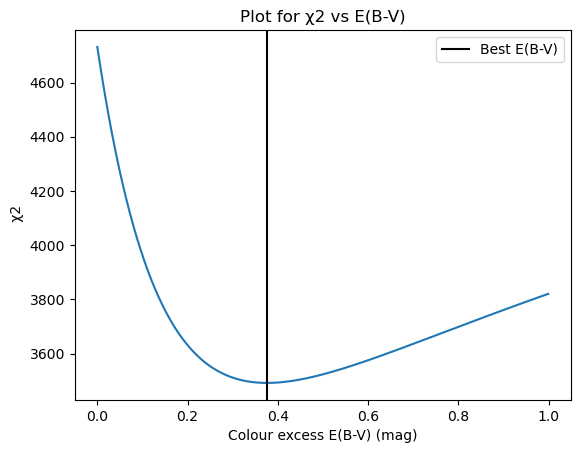

In [26]:
# Plot showing Chi square and colour excess
plt.title('Plot for χ2 vs E(B-V)')
plt.plot(e,chi_squared)
plt.xlabel("Colour excess E(B-V) (mag)")
plt.ylabel(" χ2")
#plt.ylim(1000,5000)
#plt.xlim(0,1)
plt.axvline(x = e_best ,color='black' , linestyle = '-', label='Best E(B-V)')
plt.legend()
plt.show()

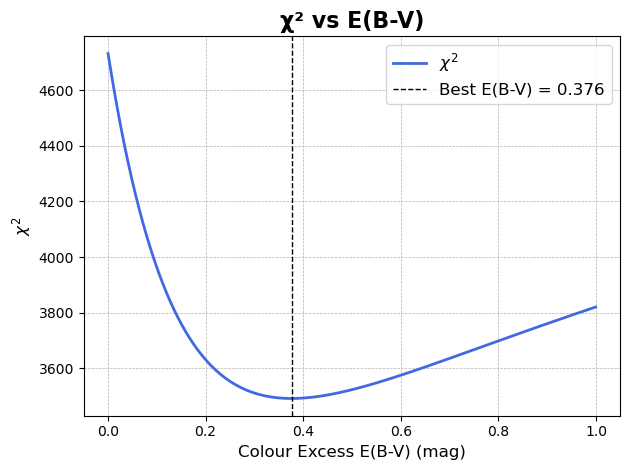

In [27]:
# Plot χ² vs E(B-V)
plt.title('χ² vs E(B-V)', fontsize=16, fontweight='bold')
plt.plot(e, chi_squared, color='royalblue', linewidth=2, label='$χ^2$')
plt.xlabel("Colour Excess E(B-V) (mag)", fontsize=12)
plt.ylabel("$χ^2$", fontsize=12)
plt.axvline(x=e_best, color='black', linestyle='--', label='Best E(B-V) = 0.376', linewidth=1)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


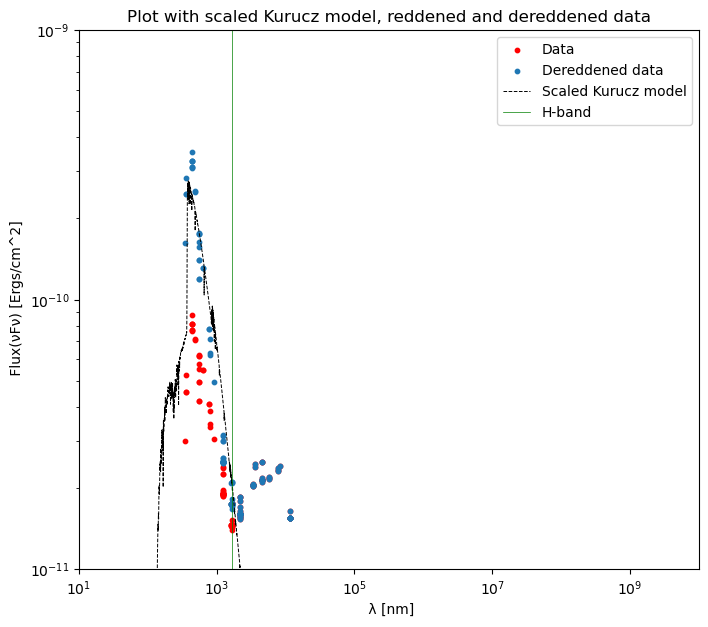

In [39]:
#Plot showing scaled Kurucz model with dereddened data
plt.figure(figsize = (8,7))
plt.scatter(obs_wavelength, vflux, s=10, label = "Data", color ='r')                  #Reddened data
plt.scatter(obs_wavelength, obs_freq*fdred_best, s=10, label = "Dereddened data")     #Dereddened data

#Scaling the model to the best dereddened flux
scaling_index = fdred_best[index_data]/m_flux[index_data]

scaled_f = []
for i in range (len(model_flux)):
  scaled_f.append(scaling_index*model_flux[i]*model_freq[i])

plt.plot(model_wav, scaled_f, 'k--' , label = "Scaled Kurucz model", linewidth = 0.7)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-11, 10**-9)
plt.xlim(10,10**10)
plt.title("Plot with scaled Kurucz model, reddened and dereddened data")
plt.axvline(x = band_wave, color = 'g', label = 'H-band', linewidth = 0.5)
plt.legend()
plt.xlabel(" λ [nm]")
plt.ylabel(" Flux(νFν) [Ergs/cm^2]")
plt.show()

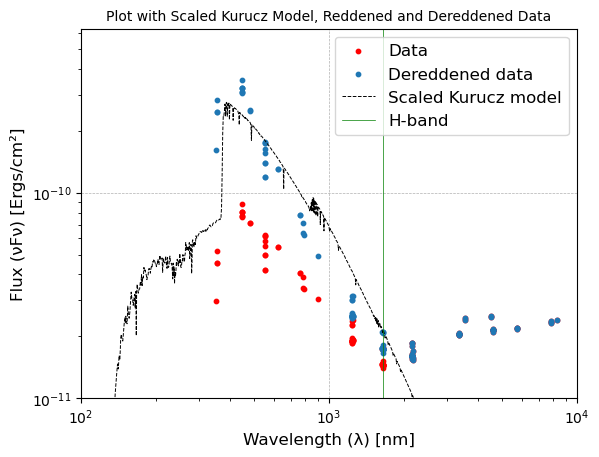

In [48]:
plt.scatter(obs_wavelength, vflux, s=10, label = "Data", color ='r')                  #Reddened data
plt.scatter(obs_wavelength, obs_freq*fdred_best, s=10, label = "Dereddened data")     #Dereddened data
plt.plot(model_wav, scaled_f, 'k--', label="Scaled Kurucz model", linewidth=0.7)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-11, 10**-9.2)
plt.xlim(10**2, 10**)
plt.title("Plot with Scaled Kurucz Model, Reddened and Dereddened Data", fontsize=10)
plt.axvline(x=band_wave, color='green', label='H-band', linewidth=0.5)
plt.legend(fontsize=12)
plt.xlabel("Wavelength (λ) [nm]", fontsize=12)
plt.ylabel("Flux (νFν) [Ergs/cm²]", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

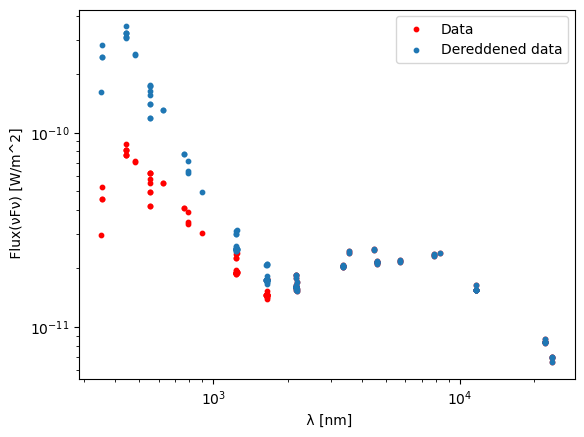

In [30]:
# Comparing the observed and dereddened data

plt.scatter(obs_wavelength, vflux, s=10, label = "Data", color ='r')                  #Reddened data
plt.scatter(obs_wavelength, obs_freq*fdred_best, s=10, label = "Dereddened data")     #Dereddened data
plt.xscale('log')
plt.yscale('log')
plt.xlabel(" λ [nm]")
plt.ylabel(" Flux(νFν) [W/m^2]")
plt.legend()
plt.show()

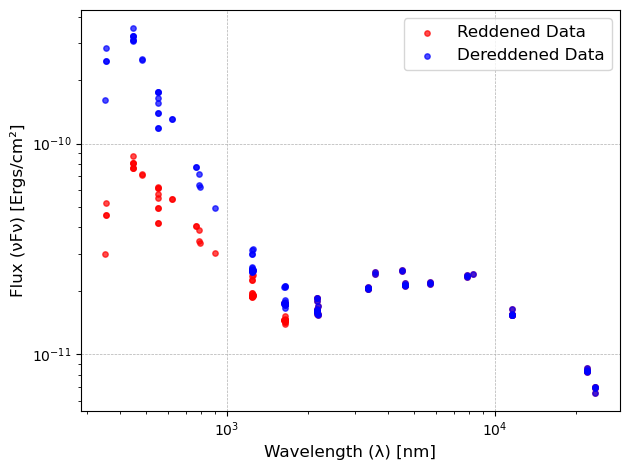

In [31]:
plt.scatter(obs_wavelength, vflux, s=15, label="Reddened Data", color='red', alpha=0.7)
plt.scatter(obs_wavelength, obs_freq*fdred_best, s=15, label="Dereddened Data", color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Wavelength (λ) [nm]", fontsize=12)
plt.ylabel("Flux (νFν) [Ergs/cm²]", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [32]:
# Monte-Carlo analysis

no =  100                                          #No of times monte carlo analysis is done
step_size = 0.002
max_range = 0.2

new_data = np.zeros(len(obs_flux))
old_data = obs_flux

lowest_chi = []
evb_best = []

for i in range (no):
  for j in range (len(obs_wavelength)):
    rand = np.random.normal()                       # To generate random numbers following a normal distribution
    new_data[j] = old_data[j] + rand*obs_eflux[j]   #  New_data = old_data + random * flux error

  e = []
  e = np.arange(0,1,0.001)
  fdred = []
  chi_squared = []

  for k in range(len(e)):
     chi_sq =  reddening(k, new_data, obs_eflux)
     chi_squared.append(chi_sq)

  min_c = min(chi_squared)

  #Creating an array with the best values of E(V-B)

  for s in range(len(e)):
    if chi_squared[s] == min_c:
      evb_best.append(e[s])



In [33]:
print(len(chi_squared))
print(len(evb_best))

1000
100


The best E(B-V) value is   0.37567999999999996
The error on E(B-V) is 0.0016904437287292365


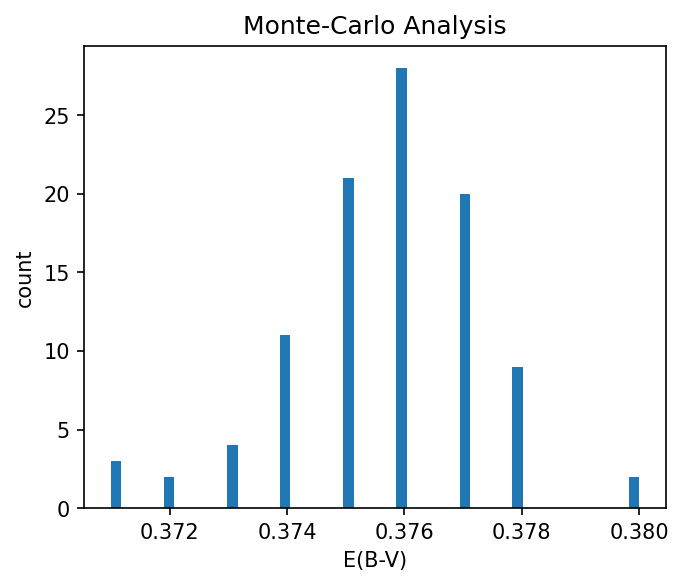

In [34]:
#evb_best.sort()
#plotting to get best E(B-V)
fig, ax = plt.subplots(dpi = 150, figsize=(5, 4))
plt.rcParams.update({'font.size':10})
plt.xlabel('E(B-V)')
plt.ylabel('count')
plt.title('Monte-Carlo Analysis')
count, bins, ignored = plt.hist(evb_best, 50, density=False)
evb_mean = np.mean(evb_best)                                             #mean
sigma = np.std(evb_best)                                    #standard deviation


print("The best E(B-V) value is  ",evb_mean)
print("The error on E(B-V) is",sigma)




The best E(B-V) value is: 0.37567999999999996
The error on E(B-V) is: 0.00169


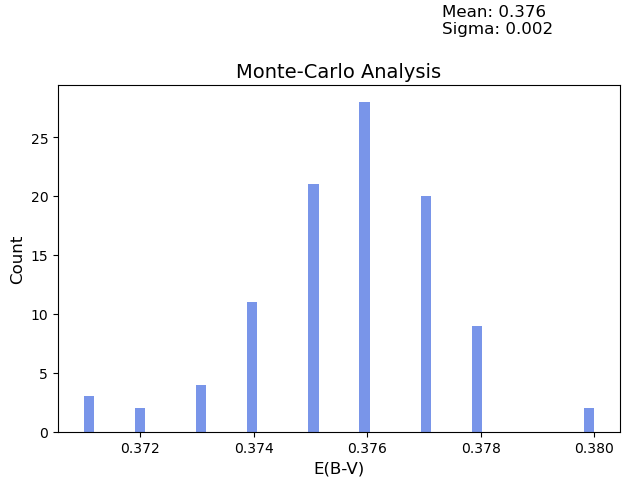

In [35]:
# Plotting to get best E(B-V)
plt.xlabel('E(B-V)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Monte-Carlo Analysis', fontsize=14)
count, bins, ignored = plt.hist(evb_best, 50, density=False, color='royalblue', alpha=0.7)
evb_mean = np.mean(evb_best)  # Mean
sigma = np.std(evb_best)      # Standard deviation

# Display mean and rounded-off sigma on the graph
plt.text(0.6, 0.9, f"Mean: {evb_mean:.3f}\nSigma: {sigma:.3f}", transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Print best E(B-V) value and its rounded-off error
print("The best E(B-V) value is:", evb_mean)
print("The error on E(B-V) is:", round(sigma, 5))

plt.tight_layout()
plt.show()


In [36]:
#Luminosity of the star

dist = 61.013*10**3                      #Distance to SMC in pc
solar_dist = 4.77* 10**-6                #Distance to sun from Earth in pc
d = 1.9*10**(23)                         # Dist to SMC in cm

tot_flux = abs(np.trapz(model_flux*scaling_index,x = model_freq))       # Integrating over all fluxes to get the total flux (converted to erg/s cm^2)

#L_obj = (dist**(2)*tot_flux)/(solar_dist**(2)*solar_flux)

#L_cgs = (dist**(2)*tot_flux*Lsun)/(solar_dist**(2)*solar_flux)

L_obj = ((tot_flux*4*np.pi*d**(2)))

print("Luminosity of the object (in solar luminosities) :", L_obj/Lsun)

print("Luminosity of the object (in ergs/s) :", L_obj )


Luminosity of the object (in solar luminosities) : 27404.59948001277
Luminosity of the object (in ergs/s) : 1.0554881489726918e+38


In [205]:
# Radius of the star
stellar_radius = np.sqrt(L_obj/(4*np.pi*stefan_const*(Temp_obj**4)))
print("Radius of the star (in solar radius) :", stellar_radius/Rsun)

Radius of the star (in solar radius) : 81.24675636711672


In [206]:
# Luminosity of the dust

# ld = []
# fr = []
# for i in range (len(obs_wavelength)):
#   if obs_wavelength[i] >= band_wave:
#     ld.append(fdred_best[i])
#     fr.append(obs_freq[i])

# tot_flux_dust = abs(np.trapz(ld, x = fr))*10**3            # converted to erg/ s cm^2
# L_dust = (dist**(2)*tot_flux_dust)/ (solar_dist**(2)*solar_flux)         #in erg/s

new_flux = []
fr = []
for i in range (len(obs_wavelength)):
  if obs_wavelength[i] > band_wave:
    new_flux.append(obs_flux[i] - (m_flux[i]*scaling_index))
    fr.append(obs_freq[i])

tot_flux_dust = abs(np.trapz(new_flux, x = fr))    # converted to erg/ s cm^2
#L_dust = (dist**(2)*tot_flux_dust)/ (solar_dist**(2)*solar_flux)
L_dust = ((tot_flux_dust*4*np.pi*d**(2)))                 #in erg/s
print('Luminosity of dust (in solar luminosities) =' ,L_dust/Lsun)


Luminosity of dust (in solar luminosities) = 4720.928772150396


In [207]:
# Ratio of luminosities

L_ratio = 1 - np.abs((L_obj - L_dust)/(L_obj))
print("Luminosity ratio :", L_ratio)

Luminosity ratio : 0.17226775292204333


In [208]:
# Temperature of the dust

fl = []
wa = []

for i in range (len(obs_wavelength)):
  if obs_wavelength[i] > band_wave:
    fl.append(fdred_best[i]*obs_freq[i])
    wa.append(obs_wavelength[i])

max_fl = max(fl)                       #Finding the value of maximum flux
print(max_fl)

#To find λmax

for i in range(len(fl)):
  if fl[i] == max_fl:
    lambda_max = wa[i]                   # Finding the value of wavelength corresponding to the max. flux
    print(i,',' ,lambda_max)

print("Lambda_max :", lambda_max)

#Using Wein's displacement law to find temperature
wc = 2.92*10**-3   # Weins constant [m.K]
Temp_dust = wc/(lambda_max*10**(-9))        # Weins displacement law (wavelength is converted from nm to m)
print("Temperature of the dust:", Temp_dust, 'K')

2.50215e-11
28 , 4493.02287
Lambda_max : 4493.02287
Temperature of the dust: 649.8965361375958 K


In [209]:
# Radius of the dust

Radius_dust = np.sqrt((L_dust)/(4*np.pi*stefan_const*(Temp_dust**4)))
print("Radius of the dust (in solar radius) :", Radius_dust/Rsun)

Radius of the dust (in solar radius) : 5434.098152971648


In [210]:
# Distance of circumstellar dust from star

dist_dust = ((Temp_obj/Temp_dust)**2)*(stellar_radius/2)
print("Distance of the circumstellar dust from star (in solar radius) :", dist_dust/Rsun)




Distance of the circumstellar dust from star (in solar radius) : 6546.2937368678095


In [ ]:
 #radius of the dust
Rd = np.sqrt(ld/(4*np.pi*sigma* td**4))/sorad
print(Rd)
lr= ld/lso
print(lr)
